## Sanity Check Results
    We will check the correlations between the gauss of my sunspots with the area of the active regions 
    from the NOAA data set. We expect to see a linear correlation between the data sets 

# ToDo
    1. Look at images from the outliers, 
       look for explanations as to why those data points are so far away from the line
       FIRST SANITY CHECK SORTING ALGORITHM ! --> Might be easier to extract noaa area in pipeline
    
    2. Finalize parameter values for HMI images; David will send folder of images 

In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import os
% matplotlib inline

In [2]:
import extract_image_features as extract

### Load Feature Results

In [3]:
features_path = "/Users/Alexander/NASA/NASA_Sample_Data/features.txt"

In [4]:
feats_df = pd.read_csv(features_path, delimiter='\t', header = None)

In [5]:
cols = ["date", 'time', 'label', 'flux', 'lon', 'lat']

In [6]:
feats_df.columns = cols

In [7]:
feats_df.head()

,date,time,label,flux,lon,lat
0,2003 10 16,08:03:03,10477P,406.00,146.88,-14.45
1,2003 10 16,08:03:03,10477N,-12250.17,147.91,-14.49
2,2003 10 17,14:27:03,10482P,3655.00,13.30,15.37
3,2003 10 17,14:27:03,10482N,-1665.31,12.08,15.53
4,2003 10 16,04:51:03,10477P,300.00,147.35,-14.36


### Load NOAA data

In [16]:
def get_data(path):
    filelist = []
    for i, filename in enumerate(os.listdir(path)):
        # exclude the error log file
        if "ds_store" not in filename.lower():
            filelist.append(filename)
    return filelist

In [17]:
noaa_path = "/Users/Alexander/NASA/noaa_data/"

In [13]:
noaa_data = extract.get_noaa_sunspot_files(noaa_path)

In [14]:
print noaa_data.keys()

['1997', '1996', '1999', '1998', '2002', '2003', '2000', '2001', '2006', '2007', '2004', '2005', '2015', '2014', '2008', '2009', '2011', '2010', '2013', '2012']


### Get intersecting data from both sets

#### Get years from features df

In [47]:
years = np.unique([date.split(" ")[0] for date in feats_df.date.values]).tolist()

In [20]:
# get relevent years
noaa_subset = [noaa_data[year] for year in years][0]

In [21]:
# date, arnum, lat/long, clon, f(Msolar-hemishpere)
noaa_subset[0]

['20030101', '10234', 'N19W33', '321', '0030', 'Hsx', '02', '03', 'A']

In [22]:
noaa_df = pd.DataFrame(noaa_subset)

In [23]:
noaa_df.columns = ["date", "label", "lat/long", "clon", "area", '6', '7', '8', '9']

In [24]:
noaa_subset = noaa_df[["date", 'label', 'area']]

In [25]:
feats_subset = feats_df[['date','time', 'label', 'flux']]

In [33]:
noaa_subset.head()

,date,label,area
0,20030101,10234,0030
1,20030101,10239,0080
2,20030101,10240,0010
3,20030102,10234,0030
4,20030102,10239,0070


In [49]:
formated_date=  [date.replace(" ", "") for date in feats_subset.date.values]

In [54]:
feats_subset.date = formated_date

In [55]:
feats_subset.head()

,date,time,label,flux
0,20031016,08:03:03,10477P,406.00
1,20031016,08:03:03,10477N,-12250.17
2,20031017,14:27:03,10482P,3655.00
3,20031017,14:27:03,10482N,-1665.31
4,20031016,04:51:03,10477P,300.00


#### Merge data 
    Merge noaa & feats data by date and time 
    Will have to assign feats to noaa based on time of day

In [56]:
def pair_flux_area(feat_df, noaa_df):
    flux_list = []
    area_list = []
    date_time_list = []
    flux_p = []
    flux_n = []

    for f_row, date_feat in enumerate(feat_df.date):
        for n_row, date_noaa in enumerate(noaa_df.date):

            if date_feat == date_noaa:
                feat_label = feat_df.label.iloc[f_row][:-1]
                noaa_label =  noaa_df.label.iloc[n_row]

                if feat_label == noaa_label:                    
                    flux = feat_df.flux.iloc[f_row]
                    area =  noaa_df.area.iloc[n_row]
                    time = feat_df.time.iloc[f_row]
                    feat_label_with_letter = feat_df.label.iloc[f_row]

                    if "P" in feat_label_with_letter:
                        flux_p.append(flux)
                        area_list.append(area)
                        date_time_list.append([date_feat, time])
                    elif "N" in feat_label_with_letter:
                        flux_n.append(flux)
                        area_list.append(area)
                        date_time_list.append([date_feat, time])
                    else:
                        print "no assignment"
    return flux_p, flux_n, area_list, date_time_list

In [57]:
 flux_p, flux_n, area_list, date_time = pair_flux_area(feats_subset.sort_values(["date", 'time']), noaa_subset)

### Inspect Sorting Results

In [58]:
print len(date_time[::2])
print date_time[::2][0:10]

455
[['20031001', '20:51:03'], ['20031001', '20:51:03'], ['20031001', '20:51:03'], ['20031001', '20:51:03'], ['20031001', '20:51:03'], ['20031002', '03:15:03'], ['20031002', '03:15:03'], ['20031002', '03:15:03'], ['20031002', '03:15:03'], ['20031002', '09:39:03']]


In [59]:
# Since there are two flux value per noaa active region area
# each area value shows up twice - once for pos flux and once for neg flux
print flux_p[0:5]
print flux_n[0:5]
print area_list[0:10]

[364483.0, 727307.0, 2698.3499999999999, 559.29999999999995, 810500.29000000004]
[-43070.279999999999, -625.55999999999995, -36816.559999999998, -50992.720000000001, -262617.71000000002]
['0020', '0020', '0030', '0030', '0030', '0030', '0030', '0030', '0480', '0480']


In [60]:
# let's omit every odd value of the area to account for duplicates 
print len(flux_p)
print len(flux_n)
print len(area_list[::2])

455
455
455


In [61]:
flux_final = [abs(n) + p  for p, n in zip(flux_p, flux_n)]

In [62]:
area_final = area_list[::2]

In [63]:
area_final = [ int(area) for area in area_final]

In [64]:
date_time_final = date_time[::2]

In [65]:
print len(area_final)
print len(flux_final)
print len(date_time_final)

455
455
455


## Plots

In [66]:
def plot_data(flux_final, area_final, line_fit = False):
    if line_fit == True:
        fit = np.polyfit(flux_final, area_final,1)
        fit_fn = np.poly1d(fit) 
        plt.figure(figsize=(10,10))
        plt.plot(flux_final,
                 area_final, 
                 'bo', 
                 flux_final, fit_fn(flux_final), 
                 '--k');
        plt.title("Active Region Area vs. Sunspot Flux (MDI)");
        plt.ylabel("Area");
        plt.xlabel("flux");
    else:
        plt.figure(figsize=(10,10))
        plt.plot(flux_final,
            area_final, 
            'bo')
        plt.title("Active Region Area vs. Sunspot Log of Flux (MDI)");
        plt.ylabel("Area");
        plt.xlabel("flux (Log)");

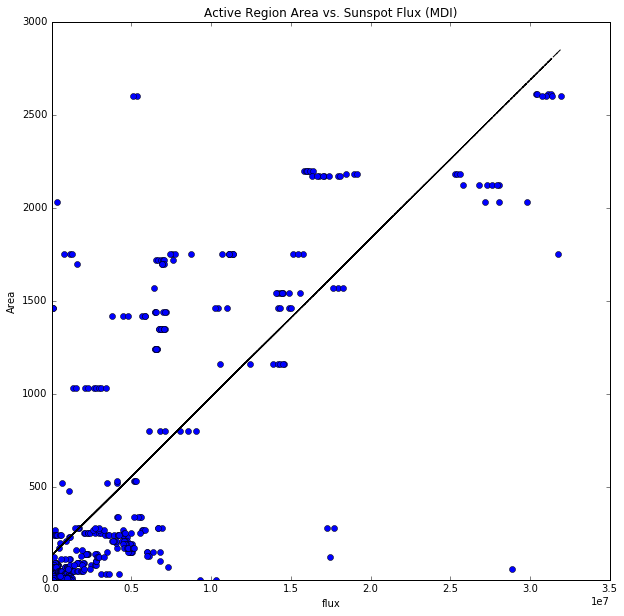

In [67]:
plot_data(flux_final, area_final, line_fit = True)

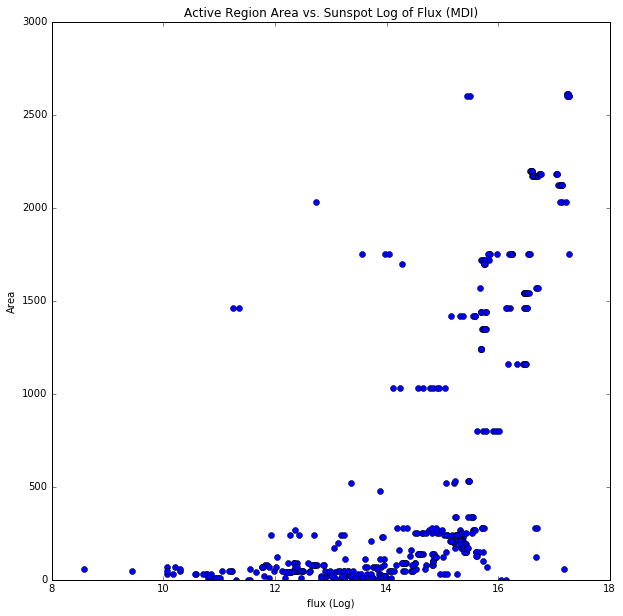

In [68]:
# Semi-Log Plot 
log_flux = np.log(flux_final)
plot_data(log_flux, area_final, line_fit = False)

#### Observations 
The area of the active regions remains relatively constant for log values bewteen 8 and 15. 

The values of area and flux increase co-linearly after the log 15 point for flux. 

# Outliers
    Find out why the outliers exist by examining the images that they originate from. 

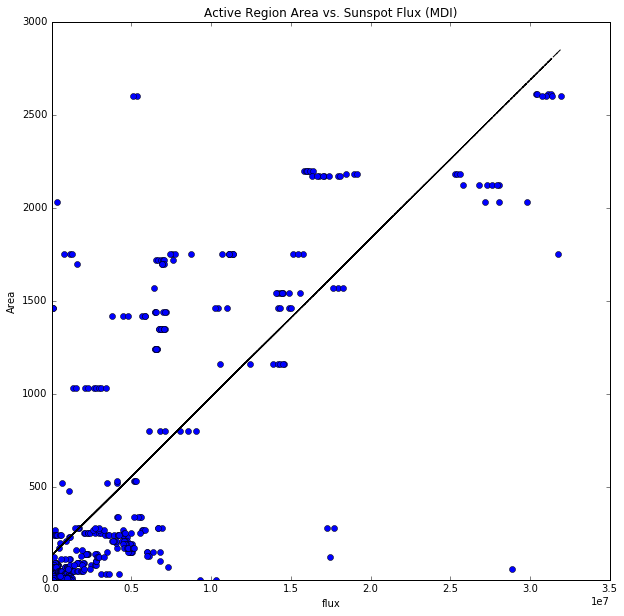

In [69]:
plot_data(flux_final, area_final, line_fit = True)

### Top right hand corner

In [70]:
area_val = 2500
flux_ub = 0.8 * 10**7
flux_lb = 0.4 * 10**7
scaled_flux = np.array(flux_final)
points = []
for flux, area, date in zip(flux_final, area_final, date_time_final):
    if flux < flux_ub and flux > flux_lb and  area > area_val:
        points.append((area, flux, date))

In [71]:
points

[(2600, 5344477.0999999996, ['20031030', '09:36:03']),
 (2600, 5117272.5499999998, ['20031030', '16:00:03'])]

### Bottom left hand corner

In [72]:
area_val = 500
flux_ub = 3.0 * 10**7
flux_lb = 1.5 * 10**7
scaled_flux = np.array(flux_final)
points_lhc = []
for flux, area, date in zip(flux_final, area_final, date_time_final):
    if flux < flux_ub and flux > flux_lb and  area < area_val:
        points_lhc.append((area, flux, date))

In [73]:
points_lhc

[(280, 17278921.890000001, ['20031030', '14:24:03']),
 (120, 17483812.710000001, ['20031030', '16:00:03']),
 (60, 28861224.969999999, ['20031031', '03:12:03']),
 (280, 17723647.559999999, ['20031031', '03:12:03'])]

### Notes
    Image ['20031030', '16:00:03'] is common to both types of outliers. 
    Both image's active region flux is large and on the same order of magnitude. 
    Yet, one AR is assing a small area and the other a large area. 

### Inspect Images

In [74]:
from astropy.io import fits

In [75]:
# load file names
image_path = "/Users/Alexander/NASA/NASA_Sample_Data/Images/"
file_name_list = []
for filename in os.listdir(image_path):
    if "ds_store" not in filename.lower():
        file_name_list.append(filename)

In [76]:
# file names for the 30th and 31st of Oct
file_names = sorted(file_name_list)[-30:]

In [83]:
i = 10
mdi_path = "/Users/Alexander/NASA/NASA_Sample_Data/Images/" + file_names[i]
hdulist_mdi =  fits.open(mdi_path)[0]
print hdulist_mdi.header["DATE-OBS"]
print hdulist_mdi.header["TIME-OBS"][:-3]   

2003/10/30
16:00:03


In [84]:
def get_clean_image(mdi_path):
    hdu_object =  fits.open(mdi_path)[0]
    df = pd.DataFrame(hdu_object.data)
    df.fillna(value=0,
              inplace=True)
    clean_data = df.values
    print  mdi_path
    return clean_data

In [85]:
image_data_30_9_36 =  get_clean_image(mdi_path)

/Users/Alexander/NASA/NASA_Sample_Data/Images/fd_M_96m_01d.3954.0010.fits


In [86]:
image_data_30_14_24 =  get_clean_image(mdi_path)

/Users/Alexander/NASA/NASA_Sample_Data/Images/fd_M_96m_01d.3954.0010.fits


In [87]:
image_data_30_16_00 =  get_clean_image(mdi_path)

/Users/Alexander/NASA/NASA_Sample_Data/Images/fd_M_96m_01d.3954.0010.fits


In [88]:
image_data_31_12_03 =  get_clean_image(mdi_path)

/Users/Alexander/NASA/NASA_Sample_Data/Images/fd_M_96m_01d.3954.0010.fits


# Top Right Corner
    Small flux, Big area issue

### Oct 30th,  9:36

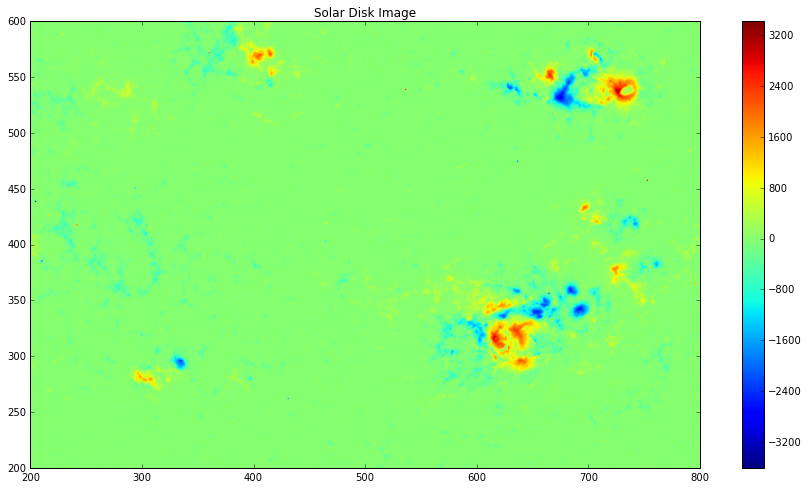

In [512]:
plt.figure(figsize = (15,8));
a1 = np.ma.masked_where(image_data_30_9_36 == 0.0, image_data_30_9_36)
plt.imshow(a1, origin='lower');
plt.title("Solar Disk Image")
plt.xlim((200,800))
plt.ylim((200,600))
plt.colorbar()

plt.show()

### Oct 30th, 16:00

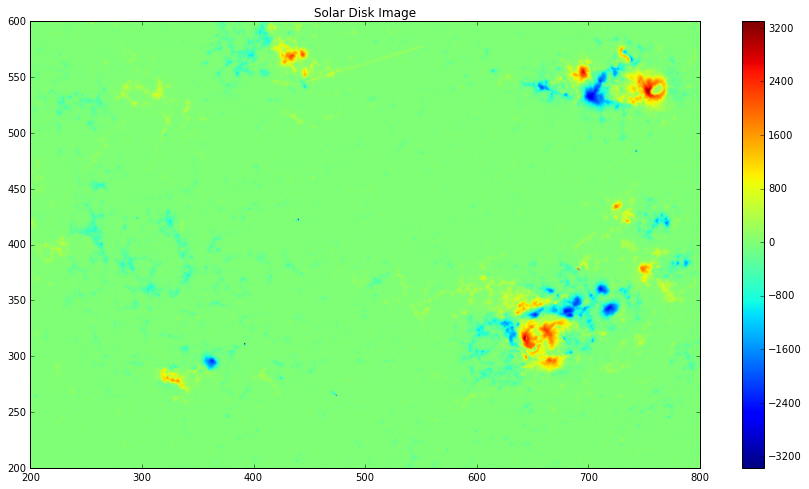

In [513]:
plt.figure(figsize = (15,8));
a1 = np.ma.masked_where(image_data_30_16_00 == 0.0, image_data_30_16_00)
plt.imshow(a1, origin='lower');
plt.title("Solar Disk Image")
plt.xlim((200,800))
plt.ylim((200,600))
plt.colorbar()

plt.show()

# Bottem Left Corner
    Small area, Big flux issue

### Oct 31st, 12:03

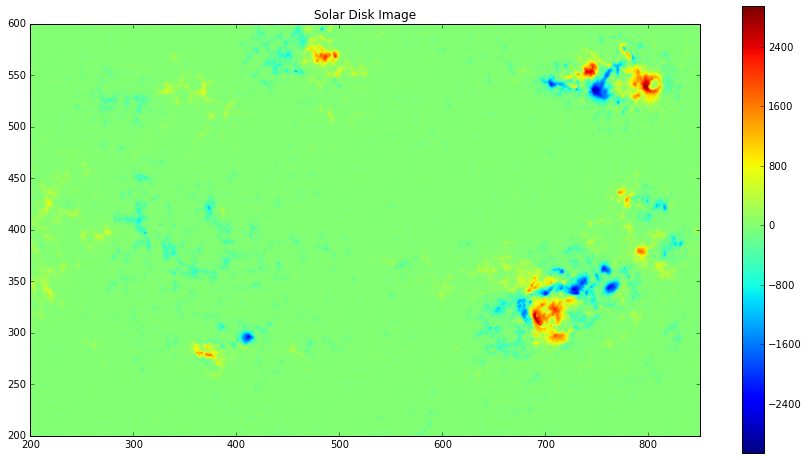

In [516]:
plt.figure(figsize = (15,8));
a1 = np.ma.masked_where(image_data_31_12_03 == 0.0, image_data_31_12_03)
plt.imshow(a1, origin='lower');
plt.title("Solar Disk Image")
plt.xlim((200,850))
plt.ylim((200,600))
plt.colorbar()

plt.show()

### Oct 30th, 14:24

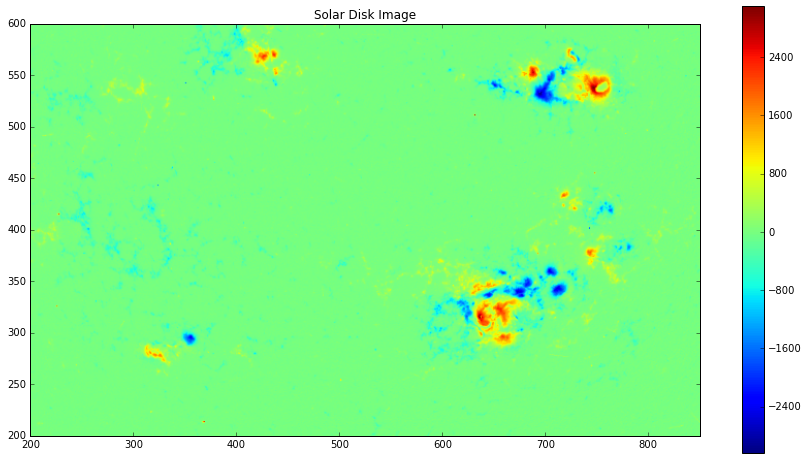

In [517]:
plt.figure(figsize = (15,8));
a1 = np.ma.masked_where(image_data_30_14_24 == 0.0, image_data_30_14_24)
plt.imshow(a1, origin='lower');
plt.title("Solar Disk Image")
plt.xlim((200,850))
plt.ylim((200,600))
plt.colorbar()

plt.show()

## Process Image Oct 30th, 16:00

In [524]:
from extract_features_script import get_active_region_map, get_active_region_labels
from time import time

In [605]:
ind = 10
path = "/Users/Alexander/NASA/NASA_Sample_Data/Images/" 
image_file = file_names[ind]
mdi_flux_filter = 120
hmi_flux_filter = 120
kernal_std = 8
start = time()
active_region_image, hdu = get_active_region_map(path, image_file, mdi_flux_filter, hmi_flux_filter, kernal_std)
end = time()
print "Time Elapsed = {}".format(end - start)

Time Elapsed = 23.5847001076


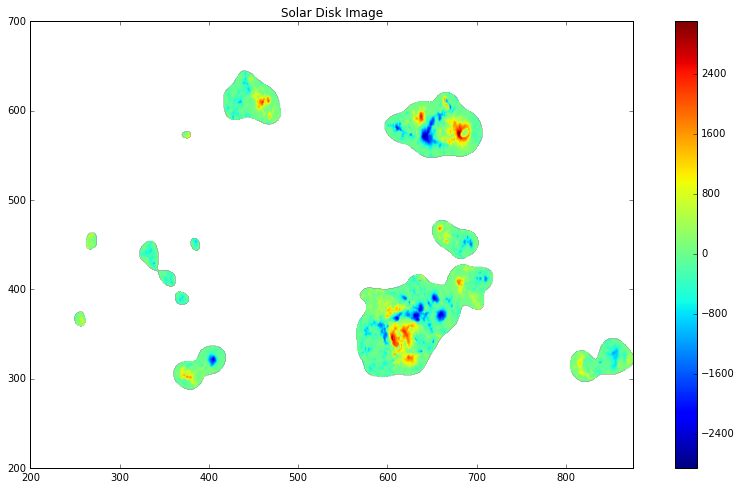

In [606]:
# Result from applying active region map of 1's and 0's on original image
plt.figure(figsize = (15,8));
a1 = np.ma.masked_where(active_region_image == 0.0, active_region_image)
plt.imshow(a1, origin='lower');
plt.title("Solar Disk Image")
plt.xlim((200,875))
plt.ylim((200,700))
plt.colorbar()

plt.show()

In [532]:
start = time()
ar_labels = get_active_region_labels(active_region_image)
end = time()
print "Time Elapsed = {}".format(end - start)

Time Elapsed = 704.674383879


In [607]:
# not sure why there are a 100 labels for 13 regions...
np.unique(ar_labels)

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
       51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67,
       68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84,
       85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99], dtype=int32)

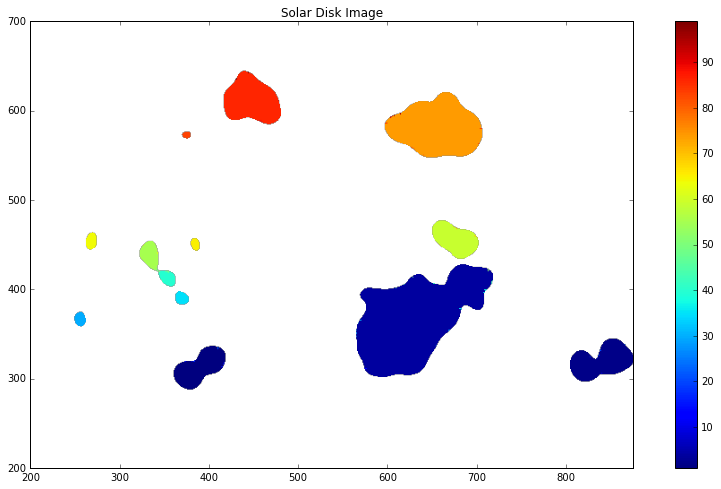

In [608]:
plt.figure(figsize = (15,8));
a1 = np.ma.masked_where(ar_labels == 0.0, ar_labels)
plt.imshow(a1, origin='lower');
plt.title("Solar Disk Image")
plt.xlim((200,875))
plt.ylim((200,700))
plt.colorbar()

plt.show()

In [543]:
from collections import Counter

In [609]:
label_counter = Counter(ar_labels.flatten())

In [610]:
# identify regions with less than 100 pixels 
small_labels = []
for label, count in label_counter.iteritems():
    if count < 100:
        small_labels.append(label)

In [613]:
# set those small regions to zero
active_region_image_copy = active_region_image.copy()
for i, row in enumerate(ar_labels):
    for j, col in enumerate(row): 
        if col in small_labels:
            active_region_image_copy[i][j] == 0.0

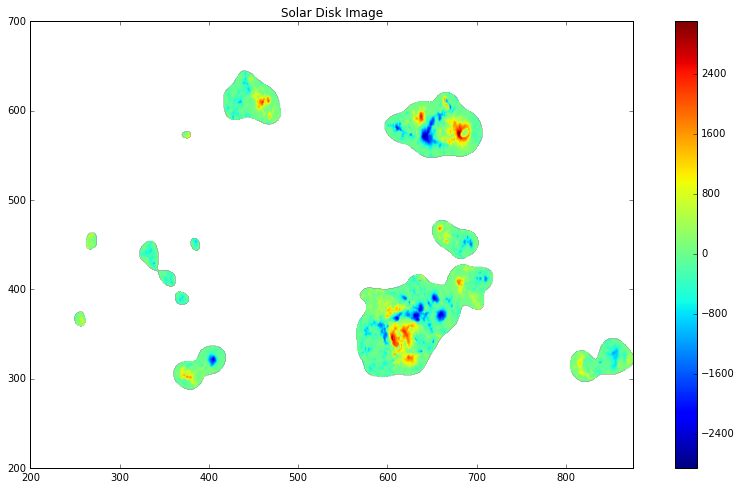

In [614]:
# resulting image after having set regions with less than 100 pixels to zero 
plt.figure(figsize = (15,8));
a1 = np.ma.masked_where(active_region_image_copy == 0.0, active_region_image_copy)
plt.imshow(a1, origin='lower');
plt.title("Solar Disk Image")
plt.xlim((200,875))
plt.ylim((200,700))
plt.colorbar()

plt.show()

In [616]:
active_region_image_copy[440][300:350]

array([   0.        ,    0.        ,    0.        ,    0.        ,
          0.        ,    0.        ,    0.        ,    0.        ,
          0.        ,    0.        ,    0.        ,    0.        ,
          0.        ,    0.        ,    0.        ,    0.        ,
          0.        ,    0.        ,    0.        ,    0.        ,
          0.        ,    0.        ,    0.        , -386.95535996,
       -241.13008024, -262.14378106, -270.46549444, -366.39749905,
       -352.32841818, -506.0196201 , -739.56982174, -467.82639443,
       -559.83246124, -541.15637836, -564.34378186, -605.25015495,
       -489.44333359, -292.25118401, -438.68138467, -387.94478741,
       -235.71283018,  -49.22036339,  -10.24870709,    6.50436623,
          0.        ,    0.        ,    0.        ,    0.        ,
          0.        ,    0.        ])